In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

In [7]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
inspector = inspect(engine)

In [12]:
inspector.get_table_names()

['measurement', 'station']

In [13]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

engine.execute('SELECT * FROM measurement LIMIT 15').fetchall()



[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0)]

In [19]:

session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01')

In [20]:
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [24]:
session.query(measurement.date).\
    filter(measurement.date > '2016-08-22').\
    order_by(measurement.date).all()

[('2016-08-23'),
 ('2016-08-23'),
 ('2016-08-23'),
 ('2016-08-23'),
 ('2016-08-23'),
 ('2016-08-23'),
 ('2016-08-23'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'

In [40]:
sel = [measurement.date, 
       measurement.prcp, 
       ]
annual_prcp = session.query(*sel).\
    filter(measurement.date > '2016-08-22').\
    filter(measurement.date <'2017-08-23').\
    order_by(measurement.station).all()
annual_prcp


[('2016-08-23', 0.15),
 ('2016-08-24', 2.15),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.03),
 ('2016-08-27', 0.18),
 ('2016-08-28', 0.14),
 ('2016-08-29', 0.17),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.1),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.02),
 ('2016-09-03', 0.07),
 ('2016-09-04', 0.03),
 ('2016-09-05', 0.11),
 ('2016-09-06', 0.05),
 ('2016-09-07', 0.1),
 ('2016-09-08', 0.22),
 ('2016-09-09', 0.01),
 ('2016-09-10', 0.01),
 ('2016-09-11', 0.18),
 ('2016-09-12', 0.04),
 ('2016-09-13', 0.37),
 ('2016-09-14', 0.9),
 ('2016-09-15', 0.12),
 ('2016-09-16', 0.01),
 ('2016-09-17', 0.04),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.01),
 ('2016-09-20', 0.09),
 ('2016-09-21', 0.06),
 ('2016-09-22', 0.09),
 ('2016-09-23', 0.15),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.02),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.12),
 ('2016-09-28', 0.08),
 ('2016-09-29', 0.49),
 ('2016-09-30', 0.31),
 ('2016-10-01', 0.14),
 ('2016-10-02', 0.02),
 ('2016-10-03', 0.04),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0

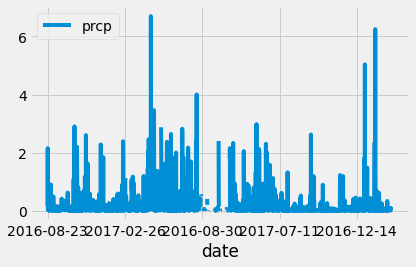

In [41]:
df = pd.DataFrame(annual_prcp, columns=['date','prcp'])
df.set_index('date', inplace=True)
df.plot.line()
plt.tight_layout()
plt.show()




In [34]:

end_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
end_date


('2017-08-23')

In [37]:
# Calculate the date 1 year ago from the last data point in the database

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)


Query Date:  2016-08-23


In [49]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date,measurement.tobs).\
    order_by(measurement.tobs.desc()).all()
results

[('2010-08-23', 87.0),
 ('2017-05-23', 87.0),
 ('2017-07-03', 87.0),
 ('2010-09-19', 87.0),
 ('2011-10-08', 86.0),
 ('2012-07-26', 86.0),
 ('2013-09-16', 86.0),
 ('2015-08-28', 86.0),
 ('2011-09-12', 85.0),
 ('2014-09-26', 85.0),
 ('2014-09-14', 85.0),
 ('2015-08-28', 85.0),
 ('2015-08-29', 85.0),
 ('2017-08-19', 85.0),
 ('2015-09-10', 85.0),
 ('2010-06-20', 85.0),
 ('2013-08-31', 85.0),
 ('2014-09-24', 85.0),
 ('2015-08-03', 85.0),
 ('2013-05-03', 84.0),
 ('2014-06-24', 84.0),
 ('2014-09-22', 84.0),
 ('2014-09-24', 84.0),
 ('2015-08-22', 84.0),
 ('2010-10-23', 84.0),
 ('2013-08-26', 84.0),
 ('2013-09-21', 84.0),
 ('2014-08-24', 84.0),
 ('2014-08-30', 84.0),
 ('2015-08-23', 84.0),
 ('2015-08-31', 84.0),
 ('2014-09-10', 84.0),
 ('2014-10-05', 84.0),
 ('2011-10-03', 84.0),
 ('2015-07-23', 84.0),
 ('2015-08-02', 84.0),
 ('2015-09-04', 84.0),
 ('2016-08-26', 84.0),
 ('2016-09-04', 84.0),
 ('2016-09-05', 84.0),
 ('2017-07-26', 84.0),
 ('2017-07-30', 84.0),
 ('2017-08-13', 84.0),
 ('2015-09-

In [55]:
date_id = [result[0] for result in results[:10]]
scores = [int(result[1]) for result in results[:10]]

In [57]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results[:10], columns=['date','score'])
df.set_index('date', inplace=True, )
df.head(10)



,score
date,
2010-08-23,87.0
2017-05-23,87.0
2017-07-03,87.0
2010-09-19,87.0
2011-10-08,86.0
2012-07-26,86.0
2013-09-16,86.0
2015-08-28,86.0
2011-09-12,85.0


In [60]:
# Sort the dataframe by date

df.sort_values(by='date')

,score
date,
2010-08-23,87.0
2010-09-19,87.0
2011-09-12,85.0
2011-10-08,86.0
2012-07-26,86.0
2013-09-16,86.0
2014-09-26,85.0
2015-08-28,86.0
2017-05-23,87.0


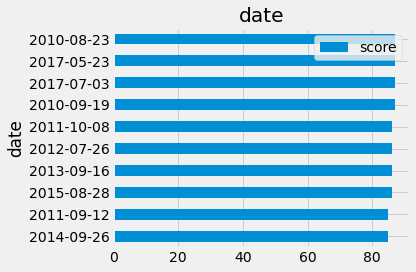

In [61]:
# Use Pandas Plotting with Matplotlib to plot the data

df.iloc[::-1].plot.barh(title="date")
plt.tight_layout()
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [43]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(station.station)).all()

[(9)]

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
